# `geopandas`

GeoPandas is a Python library that extends `pandas` by adding support for geospatial data.

## Reproducible file paths
Let's import packages we'll be working with

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/katherine/MEDS/EDS-220/eds220-2024-in-class/week4'

In [4]:
fp = os.path.join('..', 'data', 'week4_data', 'gbif_sus_scrofa_california', 'gbif_sus_scrofa_california.shp')
fp

pigs = gpd.read_file(fp)

# pigs = gpd.read_file('/Users/katherine/MEDS/EDS-220/eds220-2024-in-class/data/week4_data/gbif_sus_scrofa_california/gbif_sus_scrofa_california.shp')
pigs

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)
...,...,...,...,...,...,...,...,...,...,...,...,...
1041,1024216143,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,848609,sea-kangaroo,POINT (-121.71341 37.34271)
1042,1024215805,Sus scrofa,California,NaN,24.0,8.0,2014.0,iNaturalist,Observations,847708,Donna Pomeroy,POINT (-121.71871 37.34467)
1043,1024215159,Sus scrofa,California,NaN,23.0,8.0,2014.0,iNaturalist,Observations,845949,Alyssa Semerdjian,POINT (-120.18419 35.39745)
1044,1019052419,Sus scrofa,California,2.0,18.0,9.0,1998.0,"Borror Laboratory of Bioacoustics, Ohio State ...",Recordings,BLB30714,None,POINT (-119.55190 34.04810)


In [14]:
fp = os.path.join('data', 'week4-data', 'ca_state_boundary', 'ca_state_boundary.shp')
fp

ca_boundary = gpd.read_file('/Users/katherine/MEDS/EDS-220/eds220-2024-in-class/data/week4_data/ca_state_boundary/ca_state_boundary.shp')
ca_boundary

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## GeoSeries and GeoDataFrames

`gpd.GeoDataFrame` = `pandas.DataFrame` + geometry column

geometry column = `gpd.GeoSeries` it holds the geometry (point, polygon, etc) of each spatial feature

The other columns in the GeoDataFrame are our usual `pandas.Series`

### Example
Notice the `geometry` column in the `pigs` geo-dataframe:

In [18]:
pigs.head(3)

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)


In [21]:
# Check what kind of object is pigs
print(type(pigs))

# Check what kind of object is the geometry column
print(type(pigs.geometry))

# Check what kind of object is the species column
print(type(pigs.species))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


The data type of the geometry column is also reflected when we look at the data types of the values in eahc column

In [22]:
pigs.dtypes

gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object

In [24]:
# Check the geometry type of each element in the geometry column
pigs.geom_type

pandas.core.series.Series

## Check-in

What is the geometry type of the single feature in the CA state boundary? And why does it makes sense to have this kind of geomtry?

It's a multipolygon because some states have islands like CA, HW

In [25]:
ca_boundary.geom_type

0    MultiPolygon
dtype: object

## CRS and extent

CRS = coordinate reference system and it is one of the basic information pieces of geospatial data

We can think of the CRS as instructions to locate each spatial feature of our data frame on the surface of the Earth

In [27]:
# Access the CRS of the GeoDataFrame
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [30]:
# Get more information about the CRS
print('ellipsoid: ', pigs.crs.ellipsoid)
print('datum:', pigs.crs.datum)
print('is geographic? : ', pigs.crs.is_geographic)
print('is projected? : ', pigs.crs.is_projected)

ellipsoid:  WGS 84
datum: World Geodetic System 1984 ensemble
is geographic? :  True
is projected? :  False


- What are the ellipsoid and datum? What are they telling us about the CRS?
Ellipsoid is the shape of the earth and what you consider surface level. Datum is scattered through earht toe ground truth data

- What does it mean that the CRS is geographic and not projected?
Geographic means that you're considered it as angles
Project means that you're translating angles to 2D surface



The **extent** of the geo-dataframe is the bounding box covering all the spatial features in our geo-dataframe. This is formed by finding the points that are furthest west, east, south, and north.


In [31]:
# Obtain the geographic extent of the geodataframe
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

## Check in 

Print CRS and extent for ca_boundary. Do they match?

In [34]:
print('CRS:', ca_boundary.crs)
print('Extent:',ca_boundary.total_bounds)


pigs.crs == ca_boundary.crs

CRS: epsg:4326
Extent: [-124.48201686   32.52883674 -114.13122248   42.00950827]


True

## Data wrangling
Since `geopandas` is built on top of `pandas`, we may use everything we have learned about data selection, wrangling, and modification for `pandas.DataFrames`

### Example
We only want to use recent data for wild pig observations. 

In [36]:
# Exame pig observations by year
pigs.year.value_counts().sort_index()

1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: year, Length: 61, dtype: int64

In [38]:
# Select data from 2020 onwards
pigs_recent = pigs[pigs.year>=2020]

# Check the length of original
print('Total number of observations:', len(pigs))

# Check length of new data frame
print('Number of observations since 2020:', len(pigs_recent))

Total number of observations: 1046
Number of observations since 2020: 606


In [ ]:
## Create a map
geo-dataframes also have a `plot()` method that we can call directly to plot the data

<AxesSubplot:>

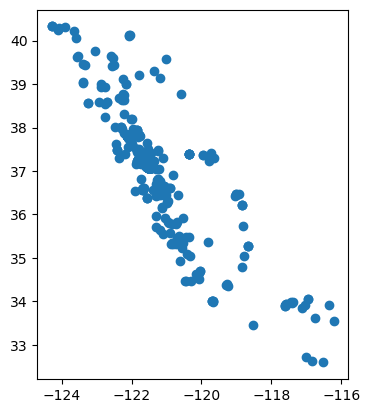

In [39]:
pigs_recent.plot()

## `matplotlib`'s `fig` and `ax` 

Matplotlib graphs the data in a **figure** which can have one or more **axes**.

The **axes** are only the area specified by a pair of x,y axes and what is plotted in it.

The **figure** may have multiple axes

To create a blank figure:

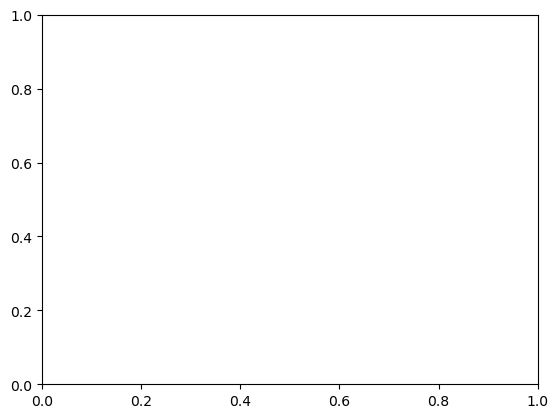

In [40]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Display the figure
plt.show()


## Add layers

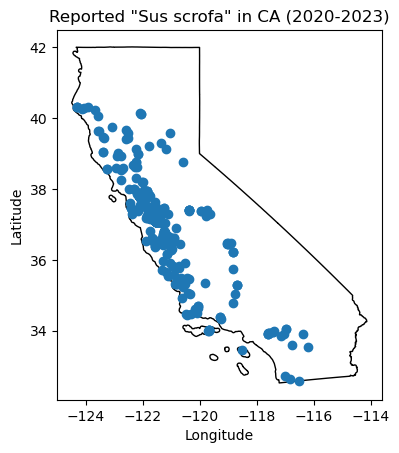

In [48]:
# Initialize an empty figure (fig) and axis (ax)
fig, ax = plt.subplots()

# Add California boundary
ca_boundary.plot(ax = ax,
                color = 'none',
                edgecolor = 'black')

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax = ax)

# Customization
ax.set_title('Reported "Sus scrofa" in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the figure
plt.show()